In [ ]:
import numpy as np 
import pandas as pd
from sklearn import *
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from itertools import * 
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
df.shape

(768, 9)

In [ ]:
df = df.sample(frac=1,random_state = 0).reset_index(drop = True)

In [ ]:
# check whether it is linearly separable or not 
x_plot = df.loc[df.Outcome == 0,:]
x_plot.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
1            2      107             74  ...                     0.404   23        0
2            4       76             62  ...                     0.391   25        0
4            0      111             65  ...                     0.660   31        0
5            1       81             72  ...                     0.283   24        0
8            2      127             58  ...                     1.600   25        0

[5 rows x 9 columns]

In [ ]:
y_plot = df.loc[df.Outcome == 1,:]
y_plot.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             1      199             76  ...                     1.394   22        1
3             5      166             72  ...                     0.587   51        1
6             9      152             78  ...                     0.893   33        1
7             3      176             86  ...                     1.154   52        1
10            3      158             76  ...                     0.851   28        1

[5 rows x 9 columns]

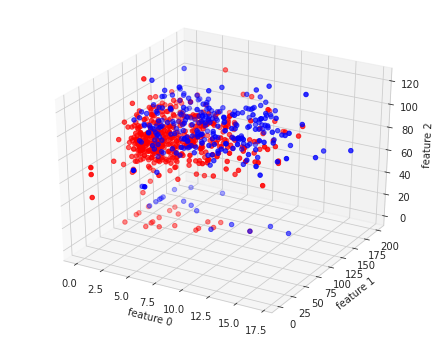

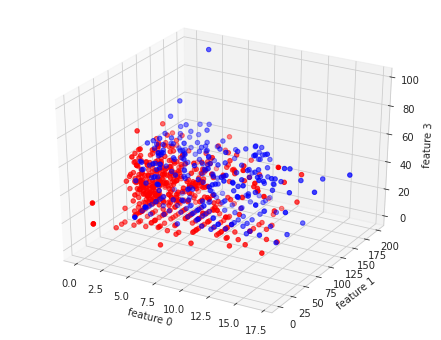

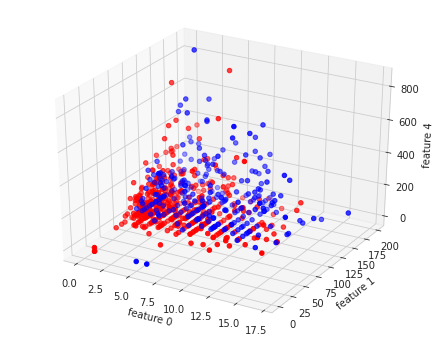

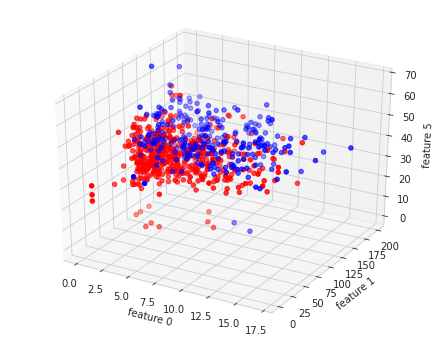

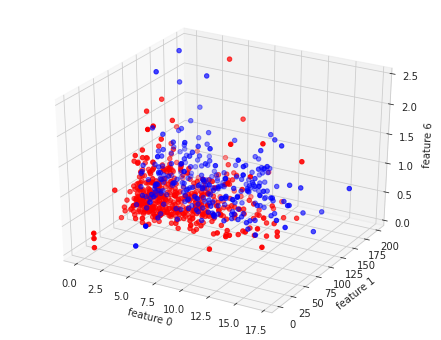

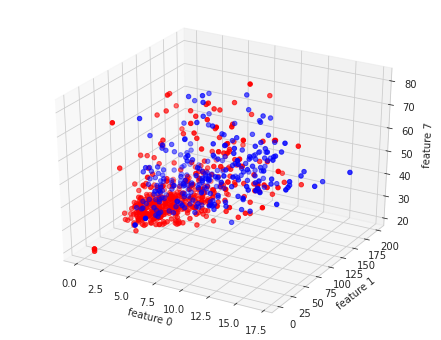

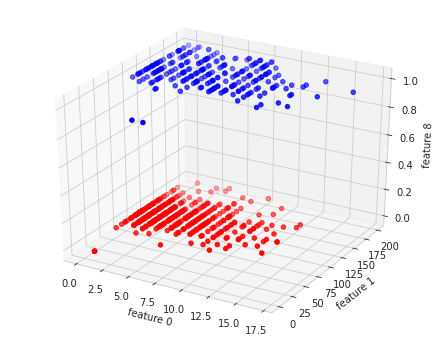

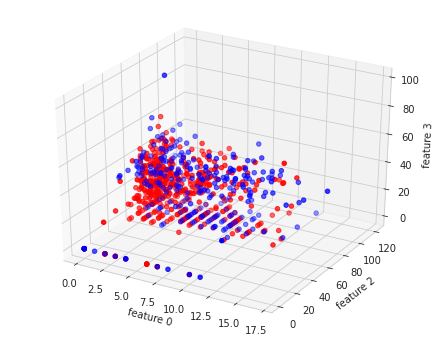

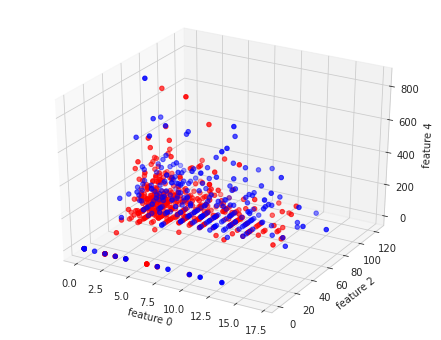

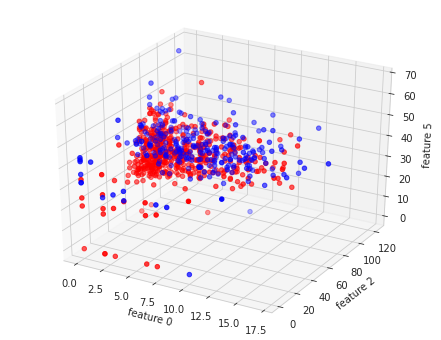

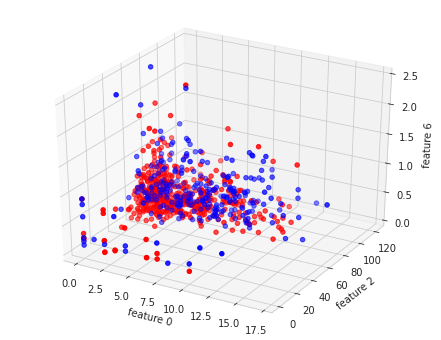

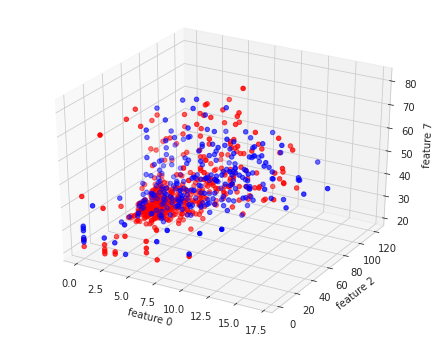

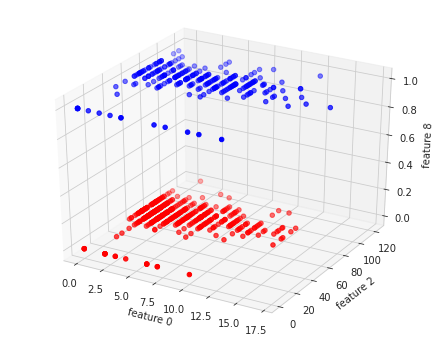

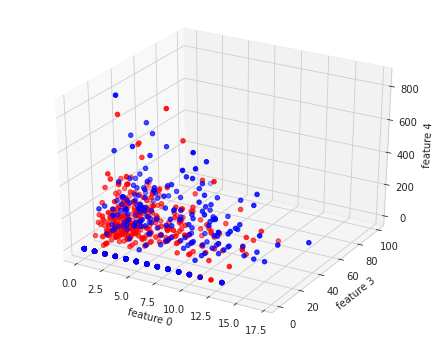

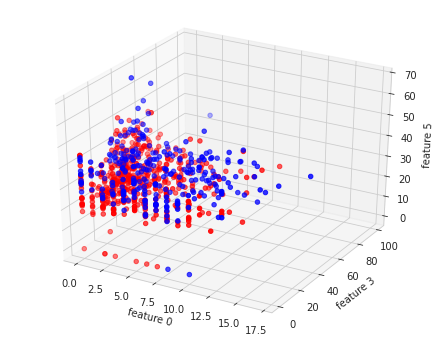

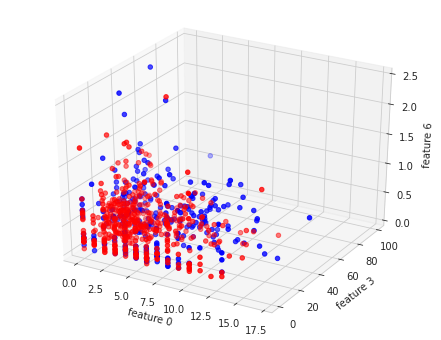

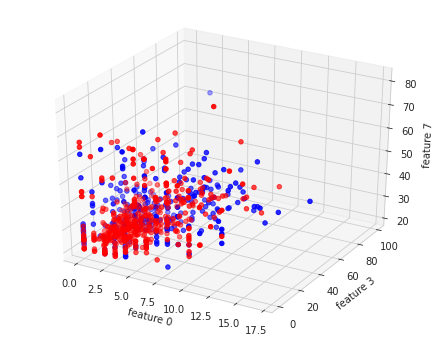

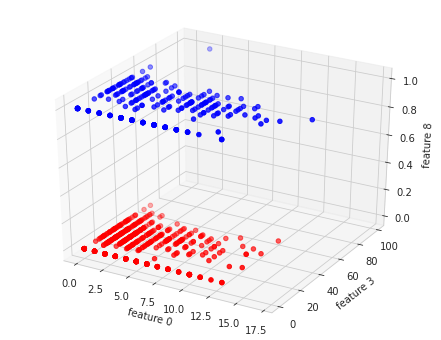

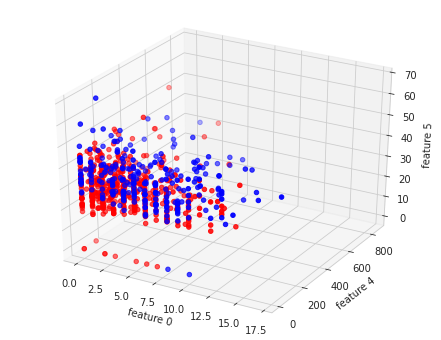

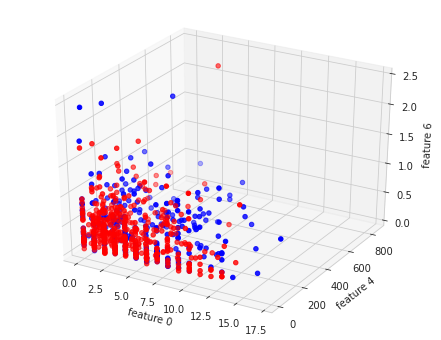

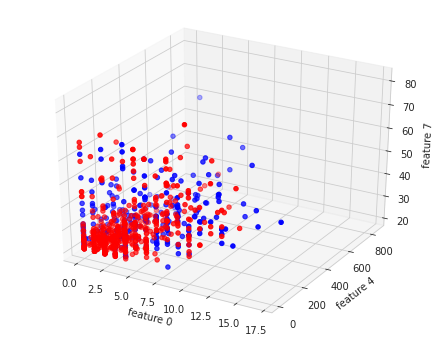

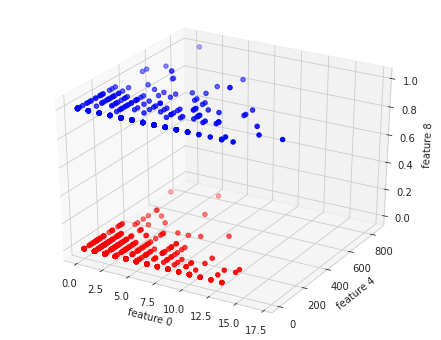

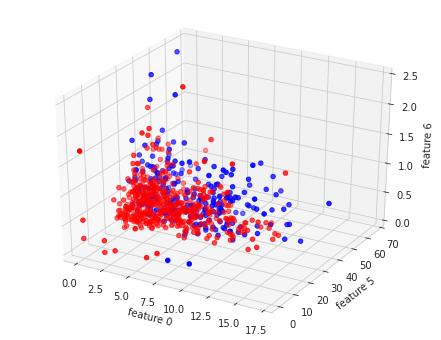

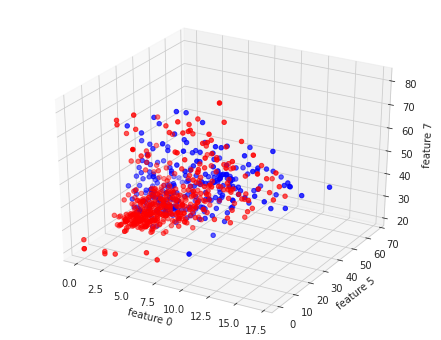

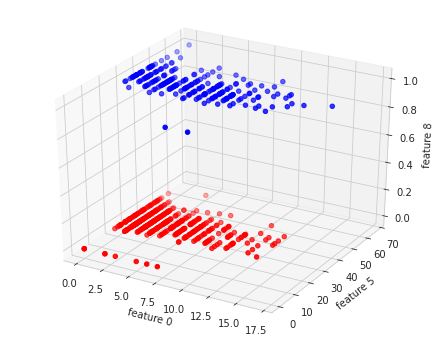

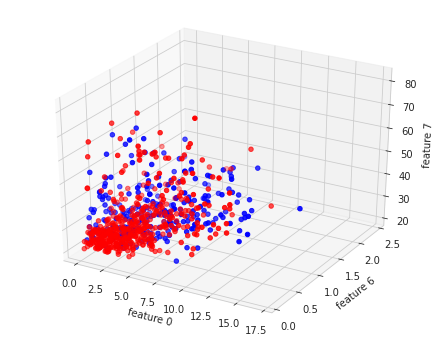

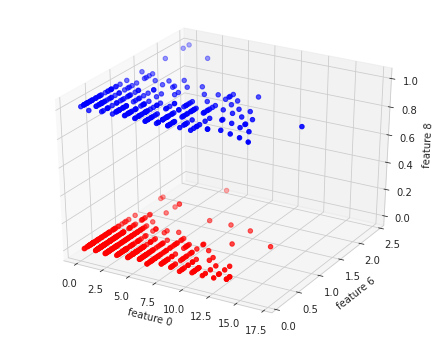

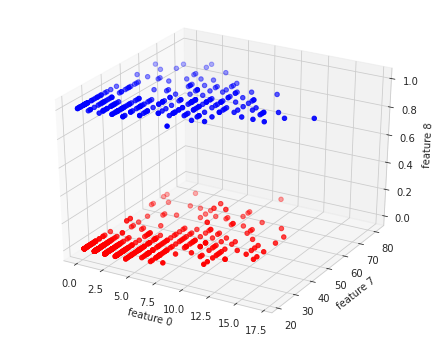

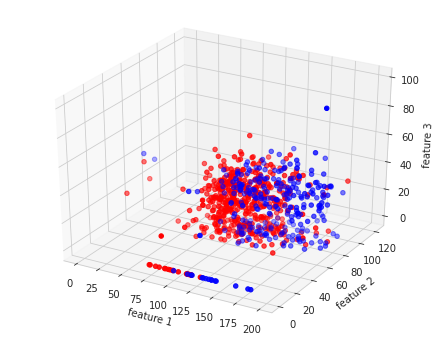

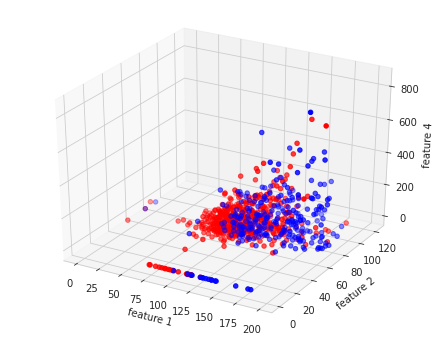

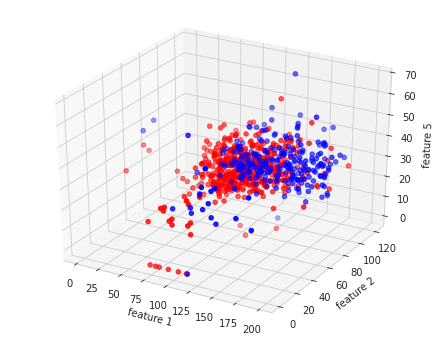

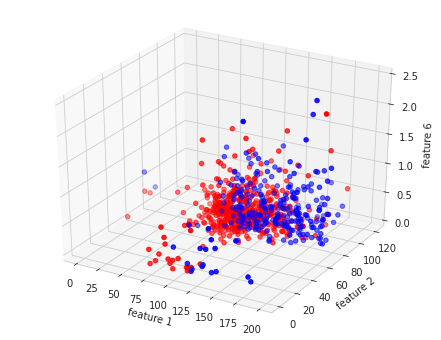

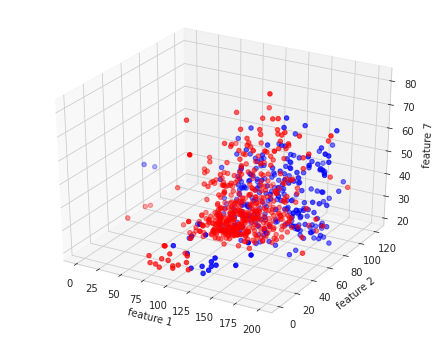

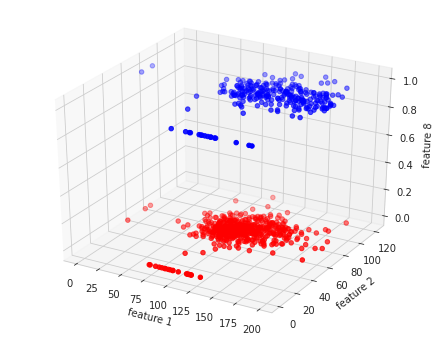

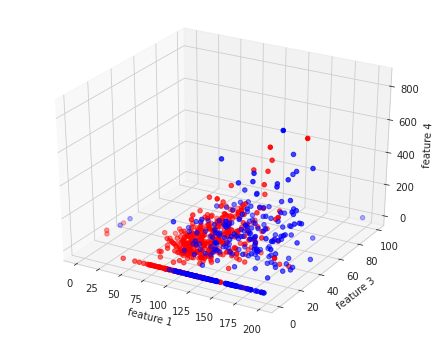

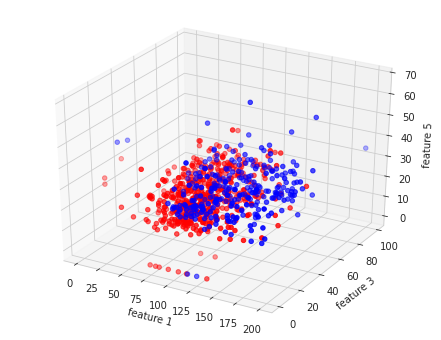

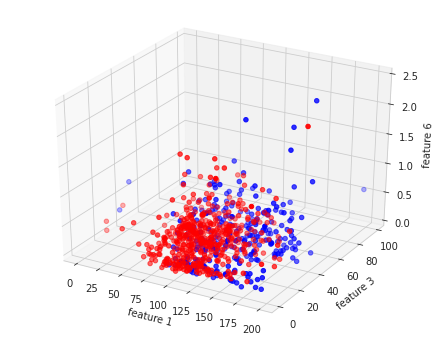

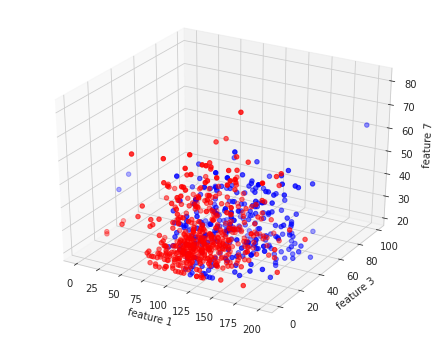

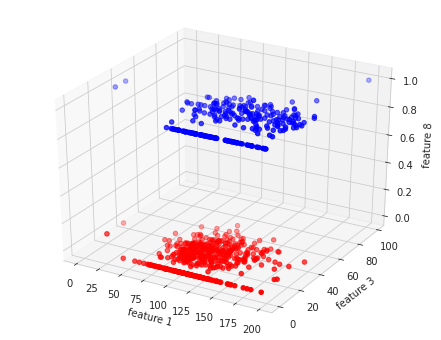

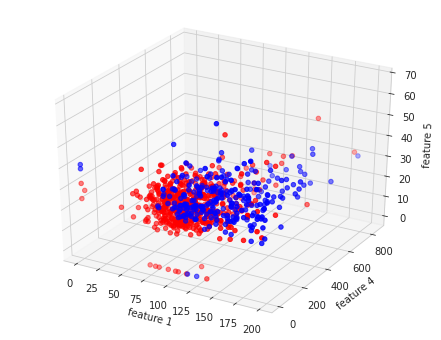

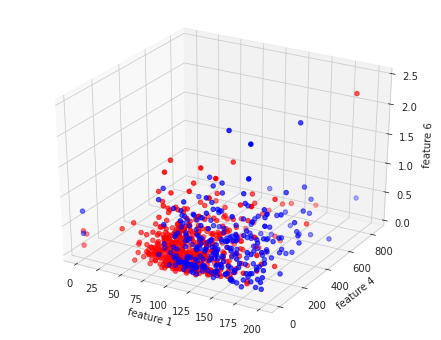

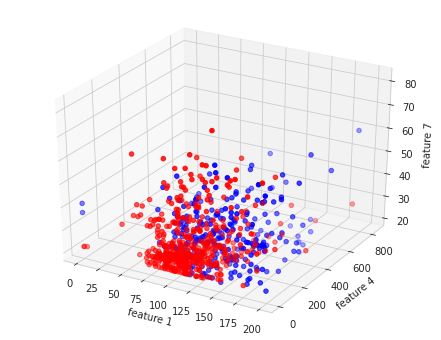

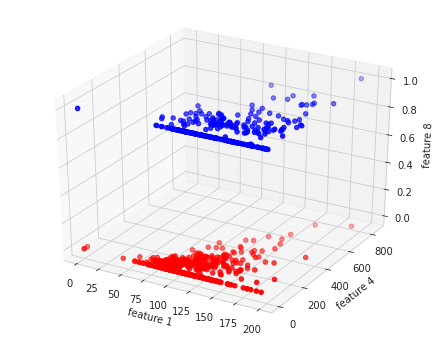

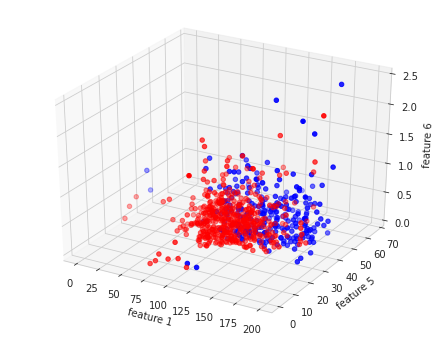

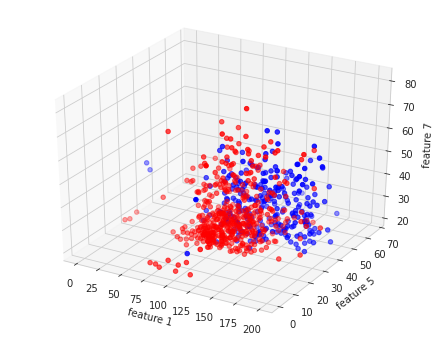

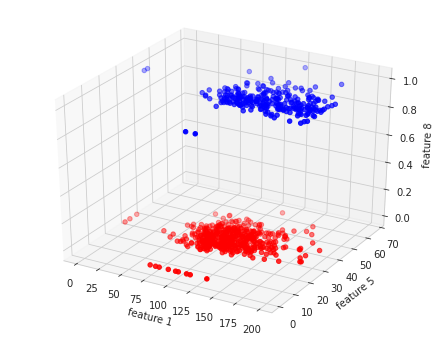

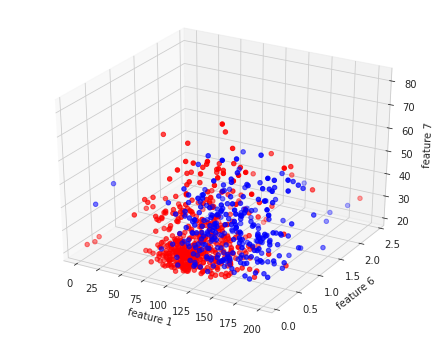

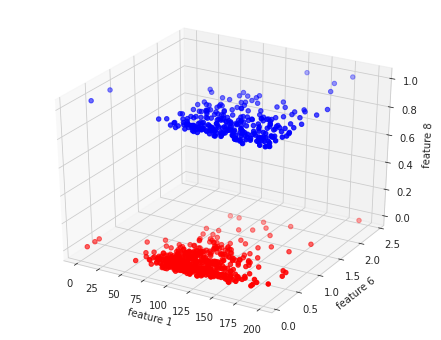

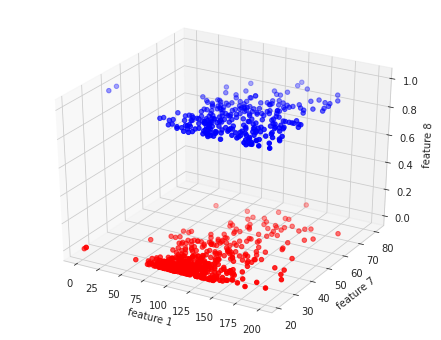

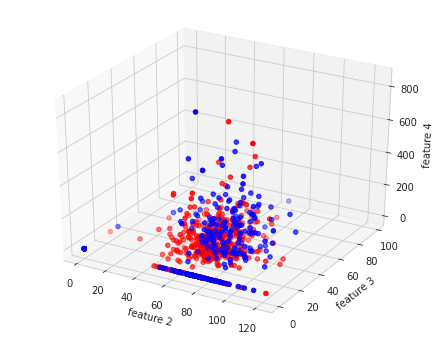

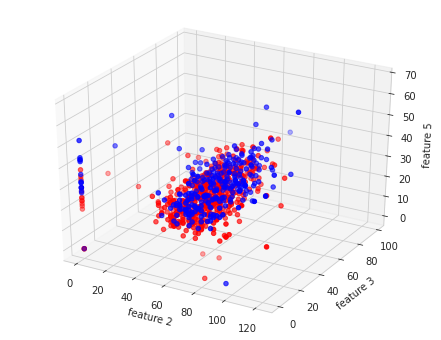

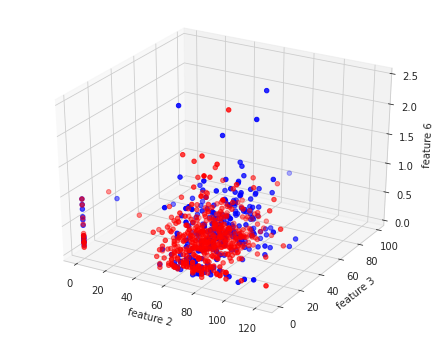

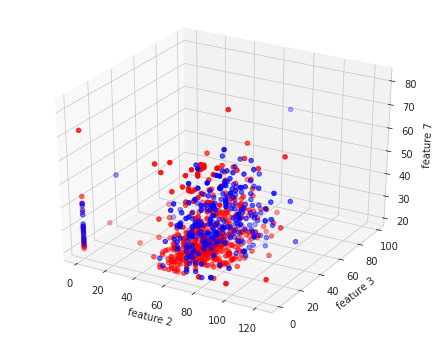

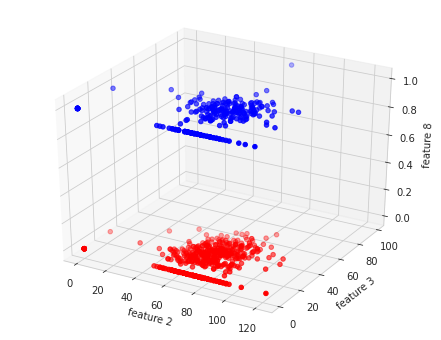

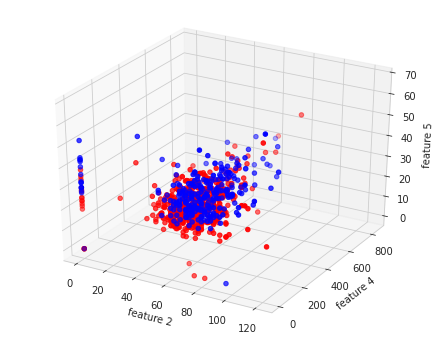

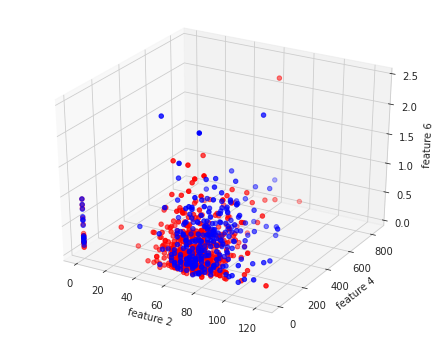

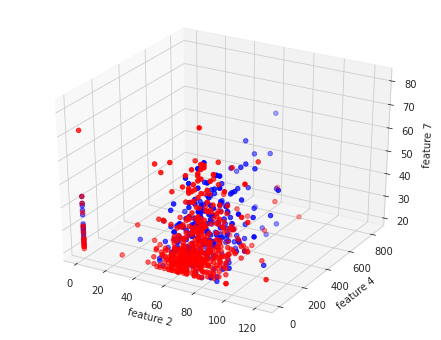

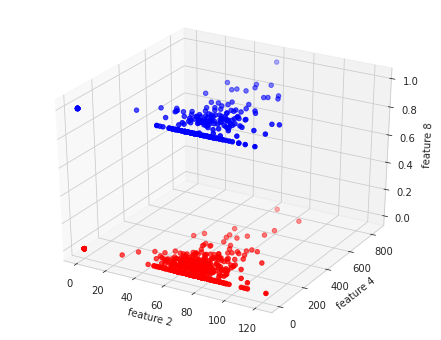

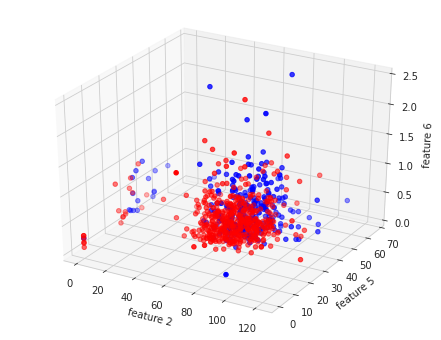

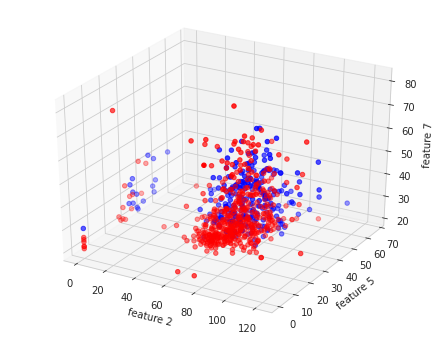

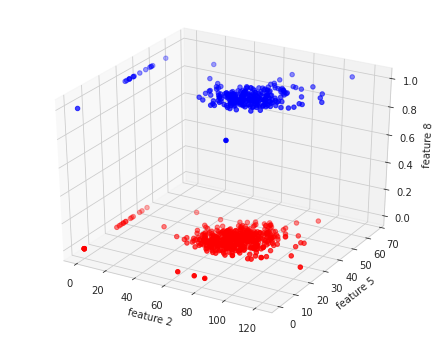

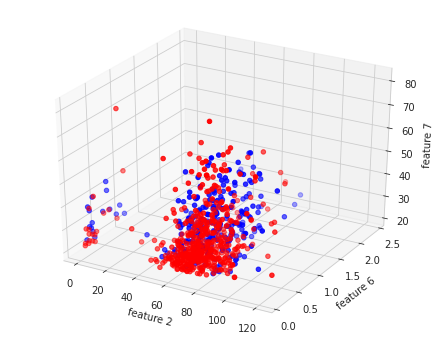

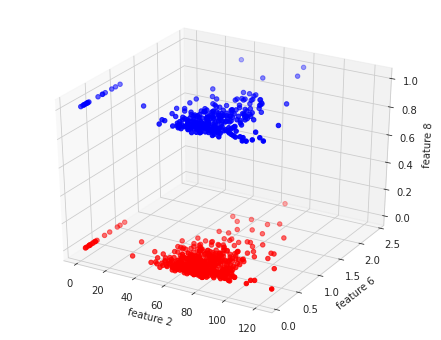

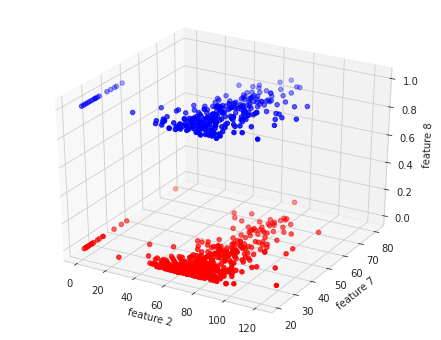

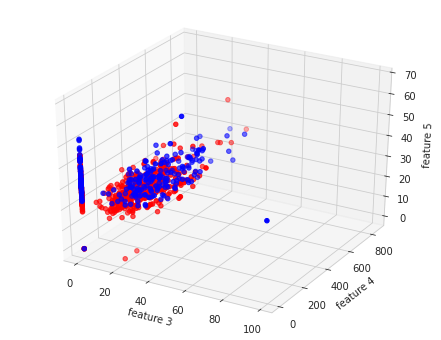

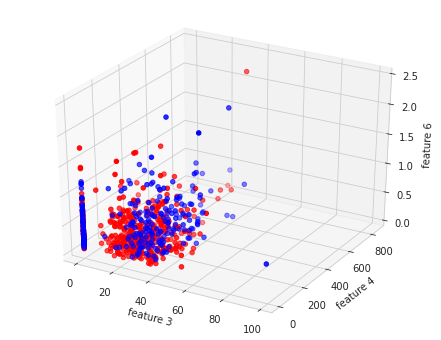

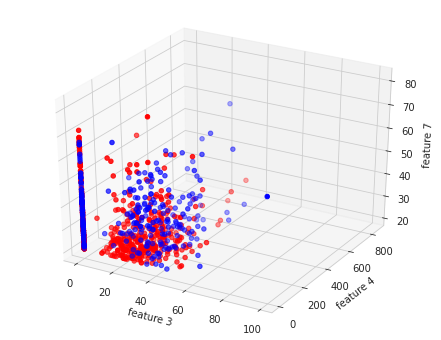

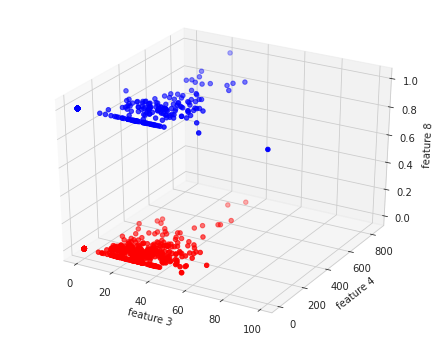

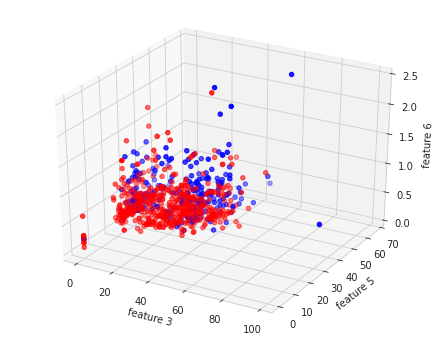

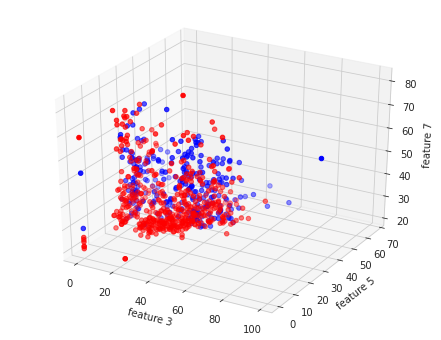

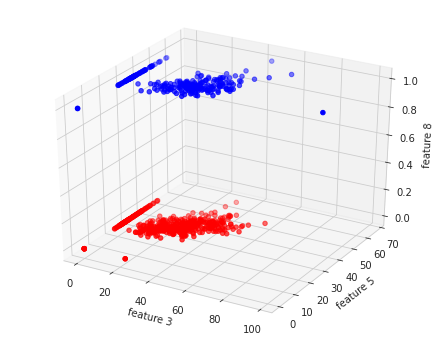

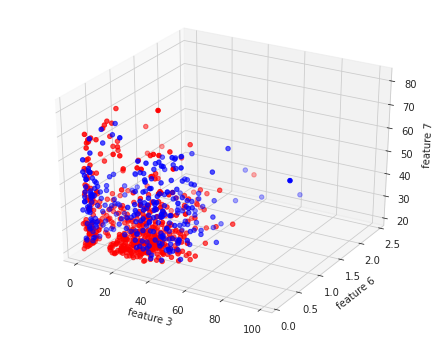

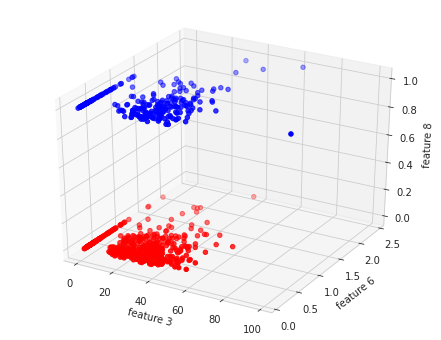

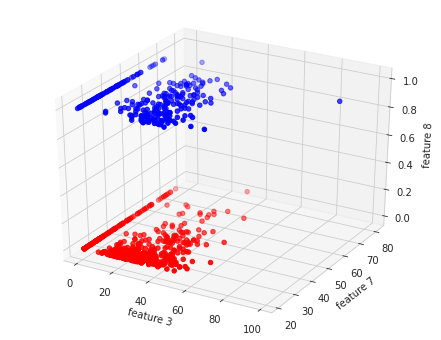

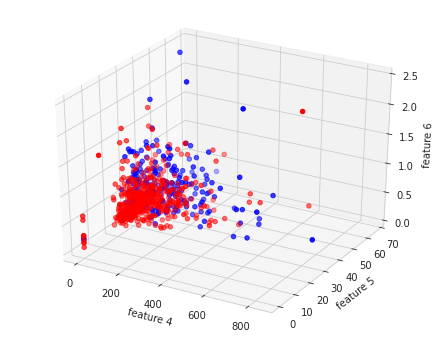

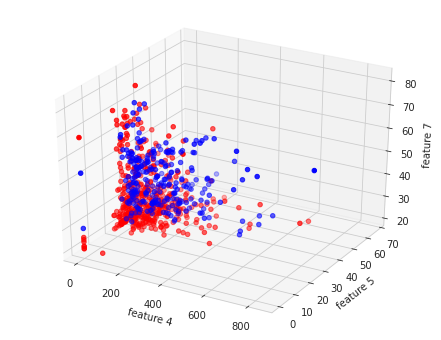

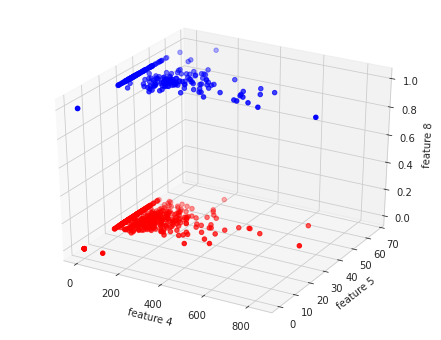

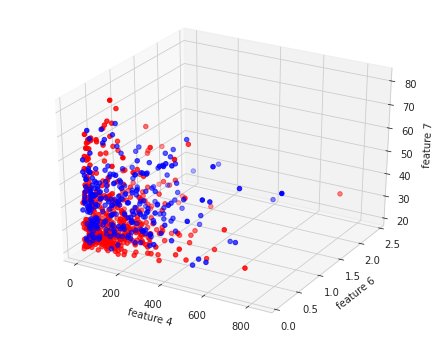

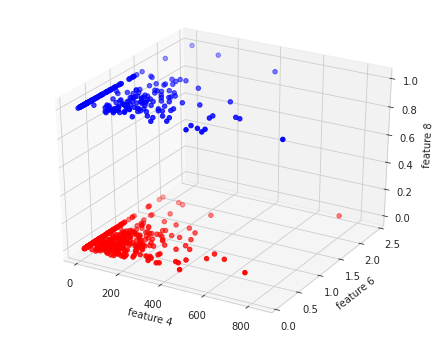

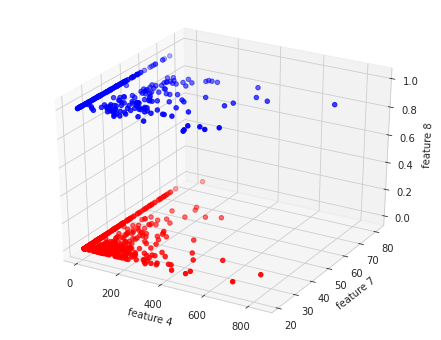

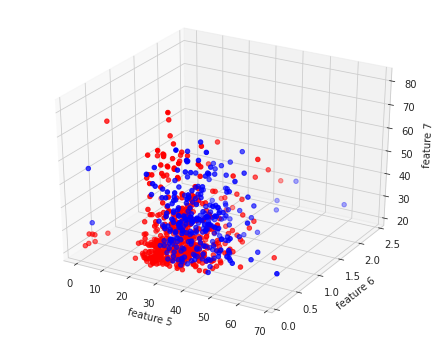

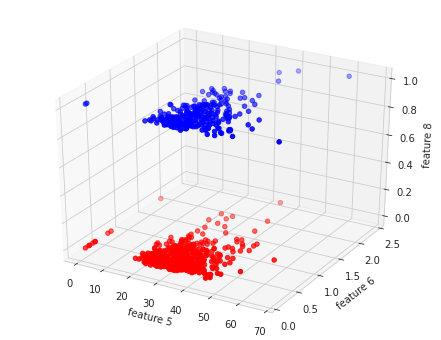

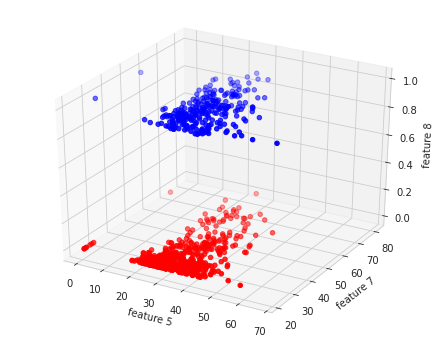

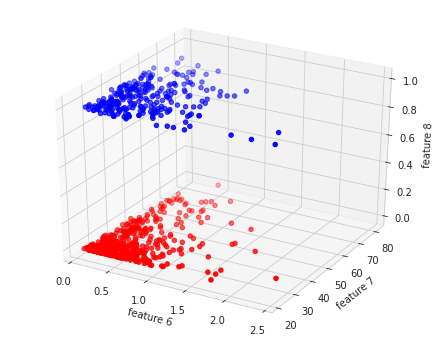

In [ ]:
l = list(combinations([i for i in range(9)],3))
for i , j,k in l:
  fig = plt.figure(figsize=(26,6))
  ax = fig.add_subplot(131, projection='3d')
  ax.scatter(x_plot.iloc[:,i], x_plot.iloc[:,j], x_plot.iloc[:,k], c='r')
  ax.scatter(y_plot.iloc[:,i], y_plot.iloc[:,j], y_plot.iloc[:,k], c='b')
  ax.set_xlabel(f'feature {i}')
  ax.set_ylabel(f'feature {j}')
  ax.set_zlabel(f'feature {k}')
  plt.show()

In [ ]:
# so we can say that data is not linearly separable 

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = (x-x.mean())/x.std()

In [ ]:
x_train = x.iloc[0:616,:]
y_train = y.iloc[0:616]
x_train.shape

(616, 8)

In [ ]:
x_validation = x.iloc[616:692,:]
y_validation = y.iloc[616:692]
x_validation.shape

(76, 8)

In [ ]:
x_test = x.iloc[692:,:]
y_test = y.iloc[692:]
x_test.shape

(76, 8)

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a = clf.predict(x_test)
print(metrics.accuracy_score(a,y_test))

0.8026315789473685


In [ ]:
clf = svm.SVC(kernel = 'poly')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a = clf.predict(x_test)
print(metrics.accuracy_score(a,y_test))

0.7894736842105263


In [ ]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
a = clf.predict(x_test)
print(metrics.accuracy_score(a,y_test))

0.8026315789473685


In [ ]:
estimate1 = [svm.SVC(C=2,kernel = 'poly'),
             svm.SVC(C=3,kernel = 'rbf'),
             svm.SVC(C=0.001,kernel = 'rbf'),
             svm.SVC(C=4,kernel = 'linear'),
             svm.SVC(C=10,kernel = 'linear'),
             svm.SVC(C=1,kernel = 'linear'),
             svm.SVC(C=5,kernel = 'rbf'),
             svm.SVC(C=500,kernel = 'poly')]

[0.69230769 0.61538462 0.61538462 0.61538462 0.66666667 0.58333333] 0.6314102564102564


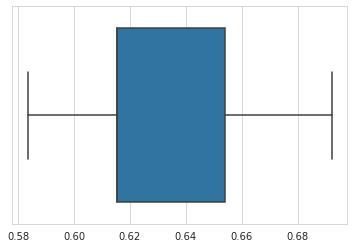

[0.46153846 0.69230769 0.61538462 0.53846154 0.58333333 0.66666667] 0.592948717948718


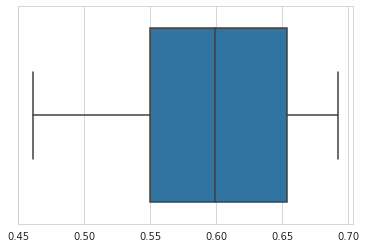

[0.69230769 0.69230769 0.69230769 0.61538462 0.66666667 0.66666667] 0.6709401709401709


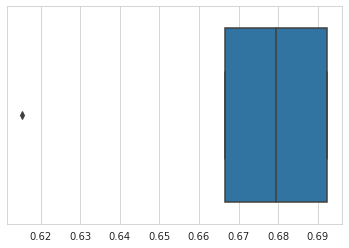

[0.69230769 0.53846154 0.69230769 0.76923077 0.75       0.75      ] 0.6987179487179488


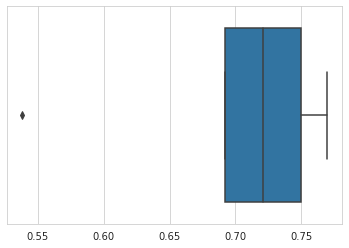

[0.69230769 0.53846154 0.69230769 0.76923077 0.75       0.75      ] 0.6987179487179488


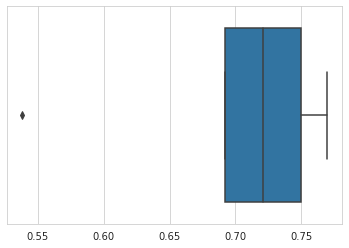

[0.69230769 0.53846154 0.69230769 0.76923077 0.75       0.75      ] 0.6987179487179488


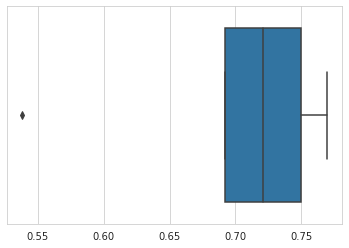

[0.46153846 0.69230769 0.61538462 0.46153846 0.58333333 0.66666667] 0.5801282051282052


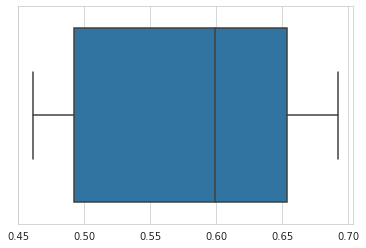

[0.61538462 0.61538462 0.69230769 0.46153846 0.66666667 0.41666667] 0.5779914529914529


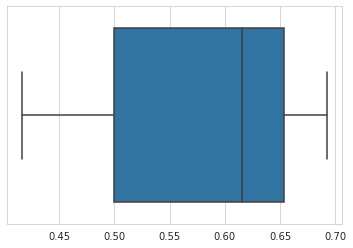

In [ ]:
for estimate in estimate1:
  b1 = model_selection.cross_val_score(estimator = estimate,X= x_validation,y=y_validation,cv = 6,n_jobs = -1)
  print(b1 , np.array(b1).mean())
  sns.boxplot(x=b1)
  plt.show()

In [ ]:
param_val = {
    'C':np.arange(1,6,0.5),
    'kernel':['rbf','linear','poly'],

    'decision_function_shape':['ovo','ovr']
}

clf1 = model_selection.GridSearchCV(estimator = svm.SVC(),param_grid=param_val,n_jobs = -1,cv = 6)
clf1.fit(x_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf1.best_estimator_

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf1.best_params_

{'C': 2.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [ ]:
clf1.best_score_

0.7694650675804301

In [ ]:
final_classifier = svm.SVC(C=2,kernel = 'rbf',decision_function_shape='ovo')
final_classifier.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
lis = final_classifier.predict(x_test)
print('accuracy ', metrics.accuracy_score(lis,y_test))

accuracy  0.7894736842105263


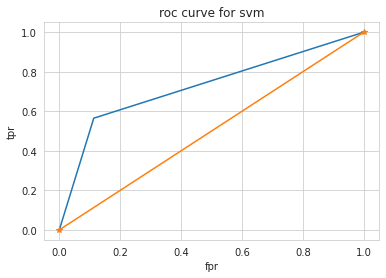

In [ ]:
fpr,tpr,auc = metrics.roc_curve(y_test,lis)
plt.plot(fpr,tpr,label =f'area : {auc}')
plt.plot([i for i in range(2)],[i for i in range(2)],marker='*')
plt.title('roc curve for svm')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
# estimate2 = [svm.SVC(C=2,kernel = 'poly',decision_function_shape='ovr'),
#              svm.SVC(C=3,kernel = 'rbf',decision_function_shape = 'ovr'),
#              svm.SVC(C=0.001,kernel = 'rbf',decision_function_shape = 'ovo'),
#              svm.SVC(C=0.0004,kernel = 'linear',decision_function_shape = 'ovo'),
#              svm.SVC(C=100,kernel = 'linear',decision_function_shape = 'ovr'),
#              svm.SVC(C=10,kernel = 'linear',decision_function_shape = 'ovr'),
#              svm.SVC(C=5,kernel = 'rbf',decision_function_shape = 'ovr')]

estimate2 = [svm.SVC(C=2,kernel = 'poly'),
             svm.SVC(C=4,kernel='poly'),
             svm.SVC(C=3,kernel = 'rbf'),
             svm.SVC(C=0.001,kernel = 'rbf'),
             svm.SVC(C=0.0004,kernel = 'linear'),
             svm.SVC(C=100,kernel = 'linear'),
             svm.SVC(C=10,kernel = 'linear'),
             svm.SVC(C=5,kernel = 'rbf'),
             svm.SVC(C=5000,kernel = 'poly')]


In [ ]:
def train_svm(model , x_train,y_train,x_test,y_test):
  if (x_train.shape[1] == 2):
    model.fit(x_train,y_train)
    a1 = model.predict(x_test)
    print("accuracy_score is : ",metrics.accuracy_score(a1,y_test))
    print("number of support vectors ",model.support_vectors_.shape[0])
    print("support vectors are : ",model.support_vectors_[:4])

    x1 = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 550)
    x2 = np.linspace(min(x_train[:, 1]), max(x_train[:, 1]), 550)
    points = np.array([[x_1, x_2] for x_1 in x1 for x_2 in x2])

    dists = model.decision_function(points)
    bounds = np.array([pt for pt, dist in zip(points, dists) if abs(dist)<0.05])
    if(len(bounds) == 0):
      return
    plt.scatter(x_train[:,0],x_train[:,1],c=['r' if y == 0 else 'b' for y in y_train])
    plt.scatter(bounds[:, 0], bounds[:, 1], c="g",s=4)
    plt.xlabel('x_value')
    plt.ylabel('y_value')
    plt.show()    

    print("\n\n")  
  else :
    model.fit(x_train,y_train)
    a1 = model.predict(x_test)
    print("accuracy_score is : ",metrics.accuracy_score(a1,y_test))
    print("support vecotors are : ",model.support_vectors_)
    print("number of support vectors : ",model.support_vectors_.shape[0])
    fpr,tpr,_ = metrics.roc_curve(y_test,a1)
    plt.plot(fpr,tpr,label=f'auc {metrics.auc(fpr,tpr)}')
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()

    print("\n\n")


accuracy_score is :  0.7894736842105263
support vecotors are :  [[-0.54756176 -0.43457596  0.25287146 ...  0.20387991 -0.20486098
  -0.87080644]
 [-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.34275743 -0.68479006 -0.78041017 ...  0.25461454  0.08186344
  -0.27558007]
 ...
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [ 1.52984968  1.09798542  0.87284044 ...  0.29266552  2.16438819
   0.744808  ]
 [-0.84433482  1.62969039  0.25287146 ...  0.60975699 -1.15859696
   0.40467865]]
number of support vectors :  332


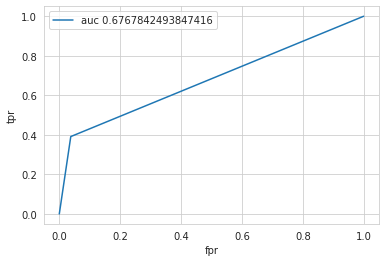




accuracy_score is :  0.7894736842105263
support vecotors are :  [[-0.54756176 -0.43457596  0.25287146 ...  0.20387991 -0.20486098
  -0.87080644]
 [-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.34275743 -0.68479006 -0.78041017 ...  0.25461454  0.08186344
  -0.27558007]
 ...
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [ 1.52984968  1.09798542  0.87284044 ...  0.29266552  2.16438819
   0.744808  ]]
number of support vectors :  323


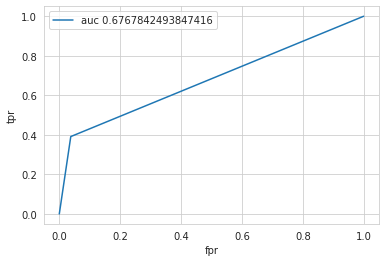




accuracy_score is :  0.7894736842105263
support vecotors are :  [[-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 [ 0.34275743 -0.21563862  0.25287146 ... -0.89959841  0.82131063
   2.0202931 ]
 ...
 [-1.14110788  1.84862773  0.45952779 ...  3.4762639   5.87973307
  -0.70074177]
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]]
number of support vectors :  336


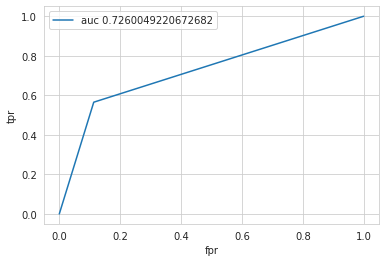




accuracy_score is :  0.6973684210526315
support vecotors are :  [[-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 [ 0.34275743 -0.21563862  0.25287146 ... -0.89959841  0.82131063
   2.0202931 ]
 ...
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [ 1.52984968  1.09798542  0.87284044 ...  0.29266552  2.16438819
   0.744808  ]
 [-0.84433482  1.62969039  0.25287146 ...  0.60975699 -1.15859696
   0.40467865]]
number of support vectors :  440


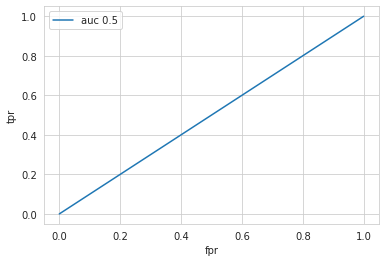




accuracy_score is :  0.6973684210526315
support vecotors are :  [[-0.54756176 -0.43457596  0.25287146 ...  0.20387991 -0.20486098
  -0.87080644]
 [-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 ...
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [ 1.52984968  1.09798542  0.87284044 ...  0.29266552  2.16438819
   0.744808  ]
 [-0.84433482  1.62969039  0.25287146 ...  0.60975699 -1.15859696
   0.40467865]]
number of support vectors :  442


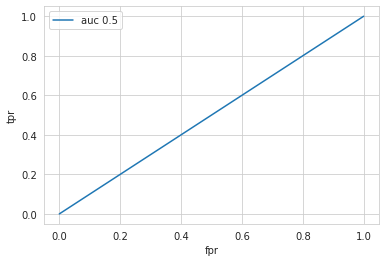




accuracy_score is :  0.8026315789473685
support vecotors are :  [[-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 [ 0.34275743 -0.21563862  0.25287146 ... -0.89959841  0.82131063
   2.0202931 ]
 ...
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [-0.84433482  1.62969039  0.25287146 ...  0.60975699 -1.15859696
   0.40467865]]
number of support vectors :  322


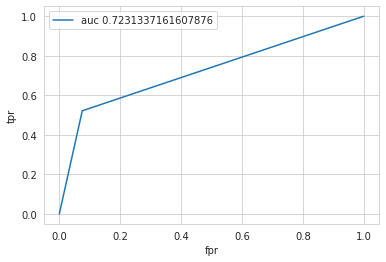




accuracy_score is :  0.8026315789473685
support vecotors are :  [[-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 [ 0.34275743 -0.21563862  0.25287146 ... -0.89959841  0.82131063
   2.0202931 ]
 ...
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [-0.84433482  1.62969039  0.25287146 ...  0.60975699 -1.15859696
   0.40467865]]
number of support vectors :  321


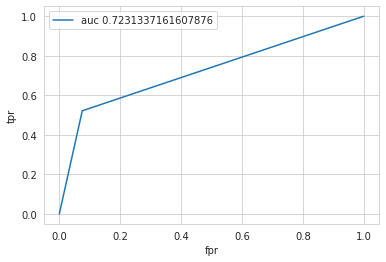




accuracy_score is :  0.7894736842105263
support vecotors are :  [[-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [ 0.63953049 -0.55968301  0.1495433  ...  0.72390992 -0.44631313
   1.85022842]
 [ 0.34275743 -0.21563862  0.25287146 ... -0.89959841  0.82131063
   2.0202931 ]
 ...
 [-1.14110788  1.84862773  0.45952779 ...  3.4762639   5.87973307
  -0.70074177]
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]]
number of support vectors :  332


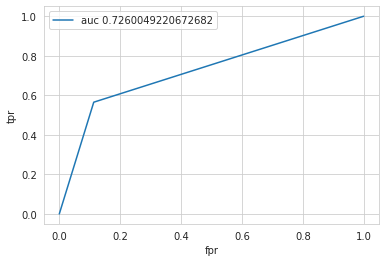




accuracy_score is :  0.75
support vecotors are :  [[-0.54756176 -0.43457596  0.25287146 ...  0.20387991 -0.20486098
  -0.87080644]
 [-0.54756176  0.1909593  -0.57375384 ... -0.54445597  3.40484859
  -0.70074177]
 [-0.54756176 -1.21649503 -0.88373833 ... -0.4429867   3.70364561
  -0.70074177]
 ...
 [ 1.82662274  0.12840577  0.04621514 ... -0.11321156 -0.8054732
   0.65977566]
 [-0.25078869  1.56713687  0.1495433  ...  0.16582893 -0.82358211
  -0.78577411]
 [ 1.52984968  1.09798542  0.87284044 ...  0.29266552  2.16438819
   0.744808  ]]
number of support vectors :  265


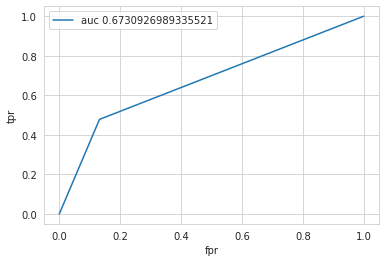

In [ ]:
for i in estimate2:
  train_svm(i,x_train,y_train,x_test,y_test)

In [ ]:
pca = decomposition.PCA(n_components=2)
a = pca.fit_transform(x_train)
b = pca.transform(x_test)

In [ ]:
print(a.shape)
print(b.shape)


(616, 2)
(76, 2)


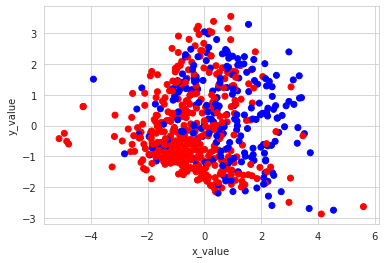

In [ ]:
plt.scatter(a[:,0],a[:,1],c=['r' if y == 0 else 'b' for y in y_train])
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.show()

accuracy_score is :  0.6973684210526315
number of support vectors  402
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.35986327  1.03183074]]


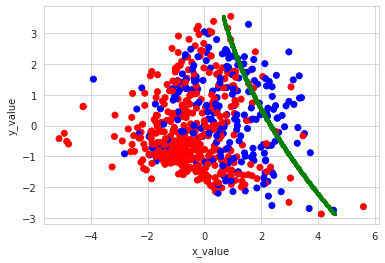




accuracy_score is :  0.6973684210526315
number of support vectors  402
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.35986327  1.03183074]]


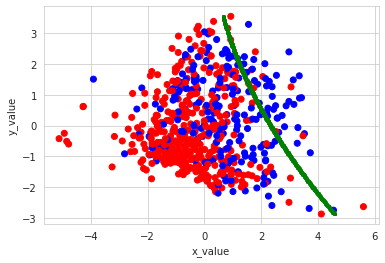




accuracy_score is :  0.7763157894736842
number of support vectors  366
support vectors are :  [[-1.52921808 -0.18659052]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]]


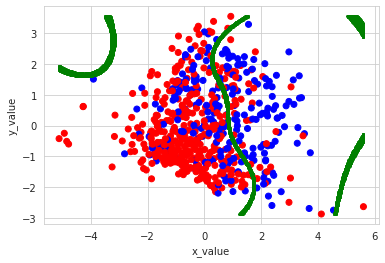




accuracy_score is :  0.6973684210526315
number of support vectors  440
support vectors are :  [[ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]
 [-0.35986327  1.03183074]]
accuracy_score is :  0.6973684210526315
number of support vectors  441
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]]
accuracy_score is :  0.75
number of support vectors  388
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]]


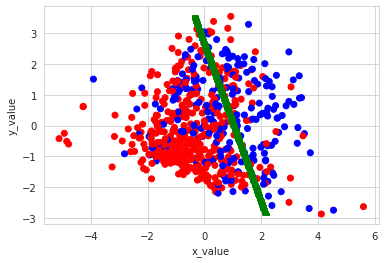




accuracy_score is :  0.75
number of support vectors  388
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]]


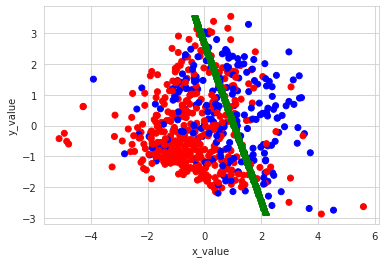




accuracy_score is :  0.7763157894736842
number of support vectors  363
support vectors are :  [[-1.52921808 -0.18659052]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.44386373  2.06149743]]


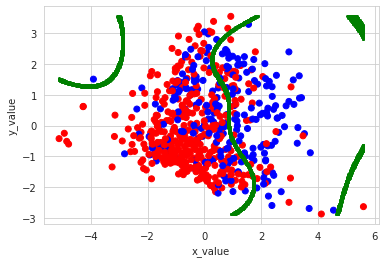




accuracy_score is :  0.6973684210526315
number of support vectors  403
support vectors are :  [[-0.02084021 -1.14627114]
 [ 1.09249391 -1.77624328]
 [ 1.29353256  0.85911094]
 [-0.35986327  1.03183074]]


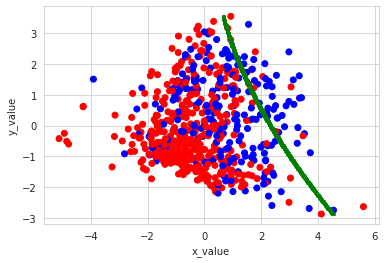

In [ ]:
for i in estimate2:
  train_svm(i,a,y_train,b,y_test)

In [ ]:
set_of_estimators = {i:svm.SVC(C=i) for i in np.arange(2,100,1)}
set_of_estimators

{2: SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 3: SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 4: SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 5: SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol

In [ ]:
def varwithc(set_of_estimators,x_train,x_test,y_train,y_test):
  acc = []
  for C,model in set_of_estimators.items():
    model.fit(x_train,y_train)
    a1 = model.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,a1))
  plt.figure(figsize=(10,10))
  plt.plot(list(set_of_estimators.keys()),acc)
  plt.xlabel('C')
  plt.ylabel('accuracy')
  plt.show()

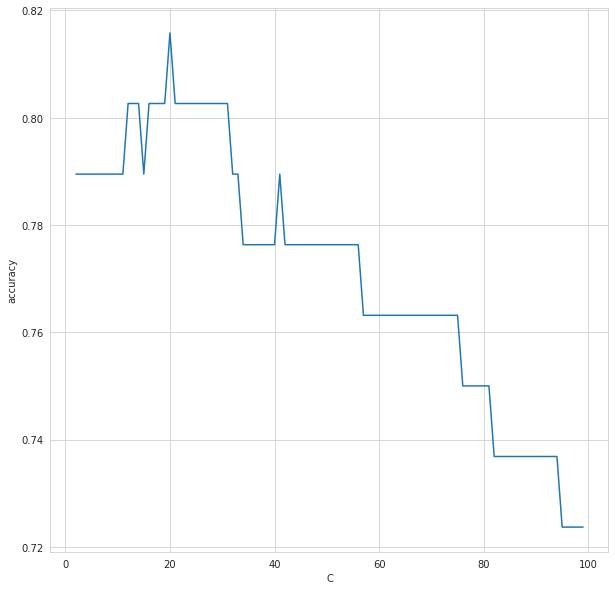

In [ ]:
varwithc(set_of_estimators,x_train,x_test,y_train,y_test)


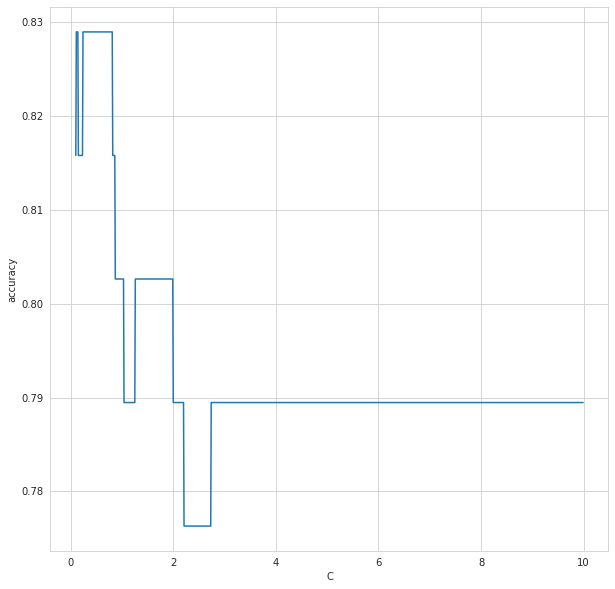

In [ ]:
varwithc({i:svm.SVC(C=i) for i in np.arange(0.1,10,0.01)},x_train,x_test,y_train,y_test) 

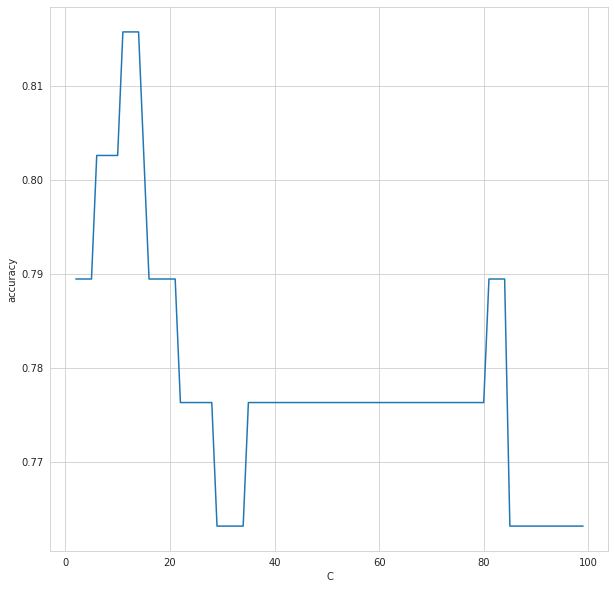

In [ ]:
varwithc({i:svm.SVC(C=i,kernel='poly') for i in np.arange(2,100,1)},x_train,x_test,y_train,y_test) 

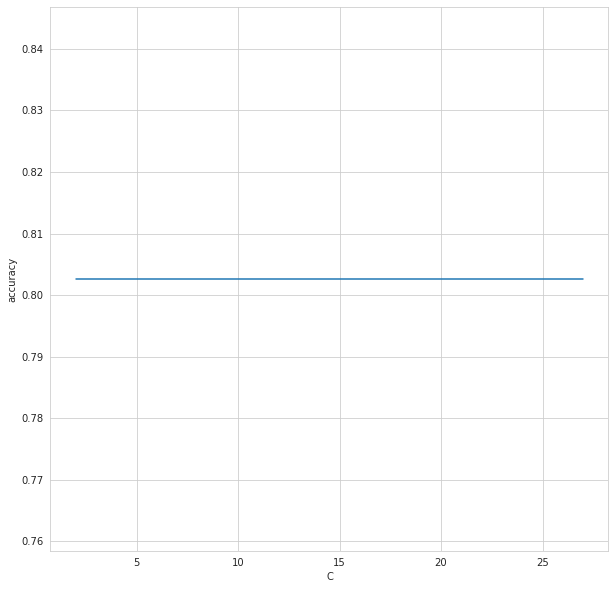

In [ ]:
varwithc({i:svm.SVC(C=i,kernel='linear') for i in np.arange(2,30,5)},x_train,x_test,y_train,y_test) 